## 참고 문서

https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-use-k-fold-cross-validation-with-keras.md

## 데이터 전처리

In [25]:
import tensorflow as tf
import tensorflow.keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from PIL import Image
import cv2

In [2]:
img_dir = '/Users/User/303/KT_32px/food_competition_KT_set1/train/'
categoris = os.listdir(img_dir)
nb_categoris = len(categoris)

In [3]:
data = []
labels = []
for i in range(nb_categoris) :
    a = glob.glob(img_dir+'/'+categoris[i]+'/*.jpg')
    for j in a :
        image=tensorflow.keras.preprocessing.image.load_img(j, color_mode='rgb')
        image=np.array(image)
        data.append(image)
        labels.append(i)

In [4]:
inputs=np.array(data)
inputs=inputs/255.0
inputs.shape

(10000, 32, 32, 3)

In [5]:
labels = np.array(labels)
targets=labels.reshape(-1,1)
targets.shape

(10000, 1)

In [6]:
targets[9999]

array([49])

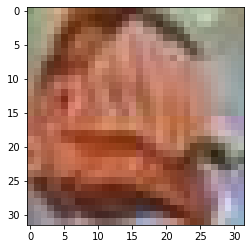

In [26]:
plt.imshow(inputs[9999])
#야미

In [8]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPooling2D,ReLU,LeakyReLU,ELU,BatchNormalization,Dropout,GlobalAveragePooling2D,Input,AveragePooling2D, Activation
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam,SGD,Nadam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.models import Model
from keras.regularizers import l2
from sklearn.model_selection import KFold
import numpy as np

# Model configuration

img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 50
verbosity = 1
num_folds = 5


In [9]:
targets.shape

(10000, 1)

In [10]:
#np.save('targets.npy',targets)

In [11]:
inputs.shape

(10000, 32, 32, 3)

In [12]:
#act=LeakyReLU(0.01)
act=ReLU()
#act=ELU()

In [13]:
# #61~63퍼 제일 잘나옴
# def model_fn():
#     model = Sequential()
#     model.add(Conv2D(32, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
#     model.add(BatchNormalization())
#     model.add(Conv2D(32, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPool2D((2, 2)))
#     model.add(Dropout(0.2))
#     model.add(Conv2D(64, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same'))
#     model.add(BatchNormalization())
#     model.add(Conv2D(64, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPool2D((2, 2)))
#     model.add(Dropout(0.3))
#     model.add(Conv2D(128, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same'))
#     model.add(BatchNormalization())
#     model.add(Conv2D(128, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPool2D((2, 2)))
#     model.add(Dropout(0.4))
#     model.add(Flatten())
#     model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.5))
#     model.add(Dense(50, activation='softmax'))
#     return model

In [14]:
#65퍼 Best batch32 epoch 200 adam()
def model_fn():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Conv2D(256, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), activation=act, kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(50, activation='softmax'))
    return model

In [15]:
# #63.8%
# def model_fn():
#     model = Sequential()
#     model.add(Conv2D(64, (3, 3), activation=act,  padding='same', input_shape=(32, 32, 3)))
#     model.add(BatchNormalization())
#     model.add(Conv2D(64, (3, 3), activation=act,padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPool2D((2, 2)))
#     model.add(Dropout(0.2))
#     model.add(Conv2D(128, (3, 3), activation=act,  padding='same'))
#     model.add(BatchNormalization())
#     model.add(Conv2D(128, (3, 3), activation=act, padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPool2D((2, 2)))
#     model.add(Dropout(0.3))
#     model.add(Conv2D(256, (3, 3), activation=act, padding='same'))
#     model.add(BatchNormalization())
#     model.add(Conv2D(256, (3, 3), activation=act, padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPool2D((2, 2)))
#     model.add(Dropout(0.4))
#     model.add(Conv2D(512, (3, 3), activation=act, padding='same'))
#     model.add(BatchNormalization())
#     model.add(Conv2D(512, (3, 3), activation=act, padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPool2D((2, 2)))
#     model.add(Dropout(0.5))
#     model.add(Conv2D(1024, (3, 3), activation=act,  padding='same'))
#     model.add(BatchNormalization())
#     model.add(Conv2D(1024, (3, 3), activation=act,  padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPool2D((2, 2)))
#     model.add(Dropout(0.5))
#     model.add(Flatten())
#     model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.5))
#     model.add(Dense(50, activation='softmax'))
#     return model

In [16]:
# # Encoder
# def model_fn():
#     input_img = Input(shape=(32,32,3))
#     conv1 = Conv2D(32, (3,3), activation=act, padding='same',name='encoder1_cov')(input_img) 
#     pool1 = MaxPooling2D(pool_size=(2,2),name='maxpool1')(conv1) 
#     conv2 = Conv2D(32, (3,3), activation=act, padding='same',name='encoder2_cov')(pool1)
#     pool2 = MaxPooling2D(pool_size=(2,2),name='maxpool2')(conv2) 
#     encoded = Conv2D(64, (3,3), activation=act, padding='same',name='encoder3_cov')(pool2) 

#     # Decoder1
#     conv4 = Conv2D(64, (3,3), activation=act, padding='same',name='decoder1_cov')(encoded)
#     #up1 = UpSampling2D((2,2),name='up1')(conv4)
#     conv5 = Conv2D(32, (3,3), activation=act, padding='same',name='decoder2_cov')(up1)
#     #up2 = UpSampling2D((2,2),name='up2')(conv5)

#     # Decoder2
#     conv6 = Conv2D(64, (3,3), activation=act, padding='same',name='decoder3_cov')(encoded)
#     #up3 = UpSampling2D((2,2),name='up3')(conv6)
#     conv7 = Conv2D(32, (3,3), activation=act, padding='same',name='decoder4_cov')(up3)
#     #up4 = UpSampling2D((2,2),name='up4')(conv7)
#     #Merge
#     con=Concatenate()([up2,up4])
#     conv8 = Conv2D(64, (3,3), activation=act, padding='same',name='decoder5_cov')(con)
#     decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same',name='result_cov')(conv8)
#     model = Model(input_img, decoded)
#     return model

In [17]:
model=model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [18]:
# #best
# def lr_schedule(epoch):
#     lr = 1e-3
#     if epoch > 180:
#         lr *= 0.5e-3
#     elif epoch > 160:
#         lr *= 1e-3
#     elif epoch > 120:
#         lr *= 1e-2
#     elif epoch > 80:
#         lr *= 1e-1
#     print('Learning rate: ', lr)
#     return lr

In [19]:
def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 150:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 100:
        lr *= 1e-2
    elif epoch > 50:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

In [20]:
lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

callbacks = [lr_reducer, lr_scheduler]


### Loss : sparse_categorical_crossentropy 사용

In [21]:
# sparse_categorical_crossentropy -> target이 int인경우 ->얘가 속도 더 빠르대
# categorical_crossentropy -> target이 ont-hot encoding된경우 사용

In [22]:
batch_size = 128 #32나 128이나 비슷 128이 속도 더 빨라서 결과내기 수월
no_epochs = 200
optimizer = Adam(0.001)
#optimizer = Nadam()


In [23]:
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True,random_state = 5)

# K-fold Cross Validation model evaluation
fold_no = 1

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
for train, test in kfold.split(inputs, targets):
    #print(train)
    #print(test)
    # Compile the model
    model=model_fn()
    model.compile(loss=sparse_categorical_crossentropy,
                optimizer=optimizer,
               
                metrics=['accuracy'])

    
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(inputs[train], targets[train],
                  epochs=no_epochs,
                  validation_data=(inputs[test], targets[test]),
                         batch_size=batch_size,
                  verbose=verbosity,
                       callbacks=callbacks)

    # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=1)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Learning rate:  0.001
Epoch 1/200
63/63 [==============================] - 4s 19ms/step - loss: 4.0636 - accuracy: 0.0776 - val_loss: 4.4068 - val_accuracy: 0.0290 - lr: 0.0010
Learning rate:  0.001
Epoch 2/200
63/63 [==============================] - 1s 10ms/step - loss: 3.1880 - accuracy: 0.1680 - val_loss: 4.8075 - val_accuracy: 0.0440 - lr: 0.0010
Learning rate:  0.001
Epoch 3/200
63/63 [==============================] - 1s 9ms/step - loss: 2.7862 - accuracy: 0.2380 - val_loss: 5.0310 - val_accuracy: 0.0640 - lr: 0.0010
Learning rate:  0.001
Epoch 4/200
63/63 [==============================] - 1s 10ms/step - loss: 2.5625 - accuracy: 0.2859 - val_loss: 4.8977 - val_accuracy: 0.0890 - lr: 0.0010
Learning rate:  0.001
Epoch 5/200
63/63 [==============================] - 1s 10ms/step - loss: 2.4017 - accuracy: 0.3214 - val_loss: 4.3062 - val_accuracy: 0.1250 - lr: 0.0010
Learning rate:  0.0

63/63 [==============================] - 1s 10ms/step - loss: 0.1874 - accuracy: 0.9450 - val_loss: 1.6663 - val_accuracy: 0.6335 - lr: 3.1623e-05
Learning rate:  0.0001
Epoch 92/200
63/63 [==============================] - 1s 9ms/step - loss: 0.1920 - accuracy: 0.9392 - val_loss: 1.6587 - val_accuracy: 0.6410 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 93/200
63/63 [==============================] - 1s 10ms/step - loss: 0.1841 - accuracy: 0.9484 - val_loss: 1.6417 - val_accuracy: 0.6415 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 94/200
63/63 [==============================] - 1s 9ms/step - loss: 0.1863 - accuracy: 0.9431 - val_loss: 1.6552 - val_accuracy: 0.6425 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 95/200
63/63 [==============================] - 1s 9ms/step - loss: 0.1900 - accuracy: 0.9414 - val_loss: 1.6782 - val_accuracy: 0.6400 - lr: 1.0000e-04
Learning rate:  0.0001
Epoch 96/200
63/63 [==============================] - 1s 10ms/step - loss: 0.1815 - accuracy: 0.9438 

63/63 [==============================] - 1s 9ms/step - loss: 0.1535 - accuracy: 0.9559 - val_loss: 1.6838 - val_accuracy: 0.6470 - lr: 3.1623e-06
Learning rate:  1e-05
Epoch 137/200
63/63 [==============================] - 1s 9ms/step - loss: 0.1585 - accuracy: 0.9519 - val_loss: 1.6898 - val_accuracy: 0.6485 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 138/200
63/63 [==============================] - 1s 10ms/step - loss: 0.1446 - accuracy: 0.9581 - val_loss: 1.6881 - val_accuracy: 0.6455 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 139/200
63/63 [==============================] - 1s 10ms/step - loss: 0.1532 - accuracy: 0.9549 - val_loss: 1.6870 - val_accuracy: 0.6450 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 140/200
63/63 [==============================] - 1s 10ms/step - loss: 0.1588 - accuracy: 0.9549 - val_loss: 1.6871 - val_accuracy: 0.6490 - lr: 1.0000e-05
Learning rate:  1e-05
Epoch 141/200
63/63 [==============================] - 1s 10ms/step - loss: 0.1583 - accuracy: 0.9525

KeyboardInterrupt: 

In [ ]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')
